AxesImage(54,36;334.8x217.44)
0
9


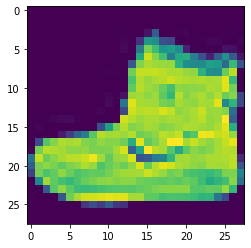

In [24]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

# Faço o import do dataset Fashion Mnist
dataset = keras.datasets.fashion_mnist

# O load data retorna duas tuplas
tuplas_dataset = dataset.load_data()

# Então eu salvo elas separadamente
((imagens_treino, identificacoes_treino), (imagens_teste, iidentificacoes_teste)) = tuplas_dataset

# Verifico que meu dataset de treino tem 60k imagens. Com o .shape eu verifico que as dimensões são 28x28
len(imagens_treino)

# E ploto uma imagem
print(plt.imshow(imagens_treino[0]))

# Verifico o número de classificações de imagens
print(identificacoes_treino.min()) # => 0
print(identificacoes_treino.max()) # => 9
# Ou senha, tenho 10 (0 até 9)

total_de_classificacoes = 10

# Nomeio as classificações de acordo com as categorias
nomes_de_classificacoes = ['Camiseta', 'Calca', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']


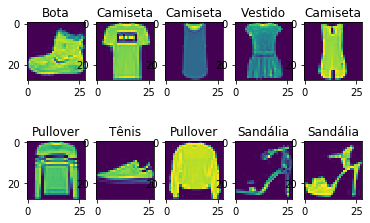

In [26]:
# Verifico e exibo todas as classificações 
for imagem in range(10):
    plt.subplot(2,5, imagem +1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [ ]:
# Camada 0 do modelo
modelo = keras.sequential([
    input_shape(28,28), # As imagens, de 28 por 28 pixels.
    processamento,
    saida
])